In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from collections import defaultdict
from cemba_data.tools.integration.utilities import calculate_direct_confusion
from ALLCools.plot import *
from ALLCools.plot.color import plot_colorbar, plot_color_legend
import xarray as xr

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/merge.py:18: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/dataarray.py:1829: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  'DataArray', pd.Series, pd.DataFrame, pd.Panel]:


## RC

In [2]:
from matplotlib import rc

labelsize = 6
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)
rc('patch', linewidth=linewidth)

In [3]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

for sub_type in cell_tidy_data['SubType'].unique():
    if sub_type not in sub_type_palette:
        # outlier and NA color
        sub_type_palette[sub_type] = '#D3D3D3'

In [5]:
deg_count = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusterMethylMarker/SubTypePairwiseDEG/Cluster_pair_marker_counts.csv',
    index_col=[0, 1]
)


In [6]:
deg_count = deg_count['GeneCount'].unstack().fillna(0)

In [7]:
deg_count_log = pd.DataFrame(np.log10(deg_count.values + 1), 
                             index=deg_count.index, columns=deg_count.columns)

In [8]:
subtype_order = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/metadata/order/SubType.order.txt',
    index_col=0,
    header=None).index
subtype_order = subtype_order & deg_count_log.index

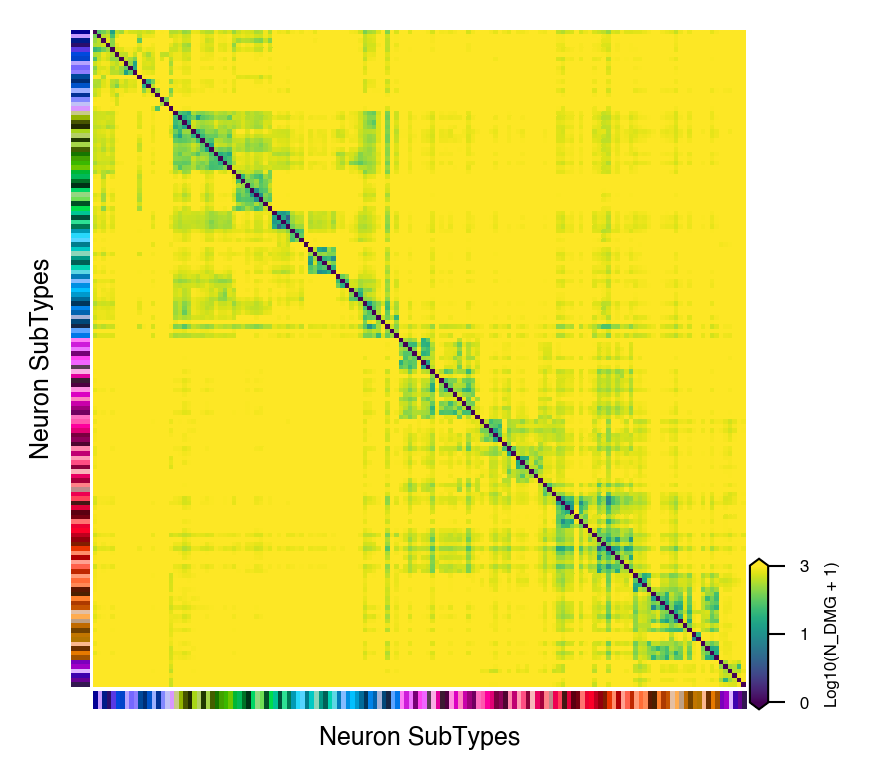

In [9]:
fig = plt.figure(figsize=(3, 3), dpi=300)

gs = fig.add_gridspec(31, 32)

ax = fig.add_subplot(gs[:-1, 1:-1])
ax_row = fig.add_subplot(gs[-1, 1:-1])
ax_col = fig.add_subplot(gs[:-1, 0])
cax = fig.add_subplot(gs[-7:, -1])

sns.heatmap(ax=ax, 
            data=deg_count_log.loc[subtype_order, subtype_order], 
            cbar=False, vmin=0, vmax=3, cmap='viridis')
ax.set(xticks=[], yticks=[])

plot_color_legend(sub_type_palette, ax=ax_row, order=subtype_order)
plot_color_legend(sub_type_palette, ax=ax_col, order=subtype_order, transpose=True)
ax_row.set(xticks=[], yticks=[], xlabel='Neuron SubTypes')
ax_col.set(xticks=[], yticks=[], ylabel='Neuron SubTypes')
sns.despine(ax=ax_row, left=True, bottom=True)
sns.despine(ax=ax_col, left=True, bottom=True)

plot_colorbar(cax=cax, cmap='viridis', hue_norm=(0, 3), label='Log10(N_DMG + 1)')
fig.savefig('PairwiseDMG.heatmap.pdf')
